In [1]:
import os
from rdkit.Chem import rdBase, RDConfig
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Descriptors import qed
from rdkit.Chem import PandasTools
print( rdBase.rdkitVersion )

2022.03.1


In [2]:
from pathlib import Path
from warnings import filterwarnings
import numpy as np
import pandas as pd
from rdkit import Chem
#from rdkit.Chem import Draw, PandasTools
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
#from tensorflow.keras.utils import plot_model
import tensorflow as tf
#np.random.seed(123)
# Silence some expected warnings
filterwarnings("ignore")

2024-02-04 22:33:39.886373: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/titan-4/anaconda3/lib
2024-02-04 22:33:39.886396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#df["smiles"]=df.ROMol.Chem.MolToSmiles(mol)

In [4]:
df = pd.read_csv("/home/titan-4/NCI_60_activity.csv", sep=',')


print(f"Shape of dataframe: {df.shape}\n")
# NBVAL_CHECK_OUTPUT

Shape of dataframe: (47196, 2)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47196 entries, 0 to 47195
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   smiles    47196 non-null  object
 1   Activity  47196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 737.6+ KB


In [6]:
df.head(3)

,smiles,Activity
0,CC1CNC(=O)C(NC(=O)C=CCC(OC(=O)C(OC1=O)CC(C)C)C...,1
1,CC1CC2CCC3C(=C)CC(O3)CCC45CC6C(O4)C7C(O6)C(O5)...,1
2,CCN(CC)C1=CC2=C(C=C1)C=C(O2)C(=O)NC3=CC4=C(C=C...,1


[22:34:31] Explicit valence for atom # 4 Sn, 5, is greater than permitted
[22:34:31] Explicit valence for atom # 4 Sn, 5, is greater than permitted
[22:34:36] WARNING: not removing hydrogen atom without neighbors


,smiles,Activity,ROMol
0,CC1CNC(=O)C(NC(=O)C=CCC(OC(=O)C(OC1=O)CC(C)C)C...,1,
1,CC1CC2CCC3C(=C)CC(O3)CCC45CC6C(O4)C7C(O6)C(O5)...,1,
2,CCN(CC)C1=CC2=C(C=C1)C=C(O2)C(=O)NC3=CC4=C(C=C...,1,

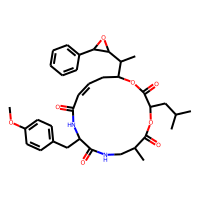
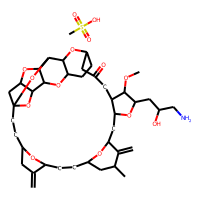
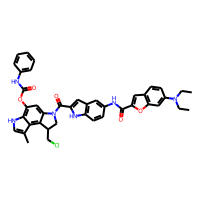

In [7]:
PandasTools.AddMoleculeColumnToFrame(df, 'smiles')
df.head(3)

In [8]:
df = df[~df['ROMol'].isnull()]

In [9]:
from rdkit.Chem.Scaffolds import MurckoScaffold


In [10]:
PandasTools.AddMurckoToFrame(df)

,smiles,Activity,ROMol,Murcko_SMILES
0,CC1CNC(=O)C(NC(=O)C=CCC(OC(=O)C(OC1=O)CC(C)C)C...,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",O=C1C=CCC(CC2OC2c2ccccc2)OC(=O)COC(=O)CCNC(=O)...
1,CC1CC2CCC3C(=C)CC(O3)CCC45CC6C(O4)C7C(O6)C(O5)...,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",C=C1CC2CCC34CC5OC6C(OC7CCC(CC(=O)CC8CCOC8CC8OC...
2,CCN(CC)C1=CC2=C(C=C1)C=C(O2)C(=O)NC3=CC4=C(C=C...,1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>",O=C(Nc1ccccc1)Oc1cc2c(c3cc[nH]c13)CCN2C(=O)c1c...

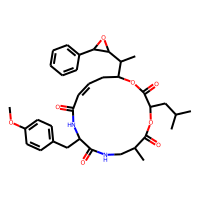
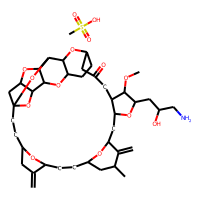
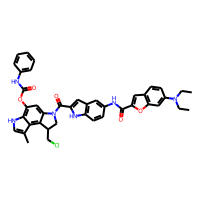

In [11]:
df.head(3)

In [13]:
sortedScaffolds = df.groupby(['Murcko_SMILES']).count().sort_values('smiles', ascending=False)

In [15]:
sortedScaffolds = sortedScaffolds[['smiles']] # Keep only smiles column
sortedScaffolds = sortedScaffolds.rename(columns={'smiles':'count'}) # rename smiles column to count
sortedScaffolds['Murcko_SMILES'] = sortedScaffolds.index # actual SMILES are only in index column, move it
sortedScaffolds.index = range(len(sortedScaffolds)+1)[1:]
sortedScaffolds.head()

,count,Murcko_SMILES
1,2155,c1ccccc1
2,1330,
3,184,c1ccncc1
4,167,c1ccc2nc3ccccc3cc2c1
5,144,C(=Cc1ccccc1)c1ccccc1


In [16]:
len(sortedScaffolds)

21269

In [17]:
PandasTools.AddMoleculeColumnToFrame(sortedScaffolds, smilesCol='Murcko_SMILES')

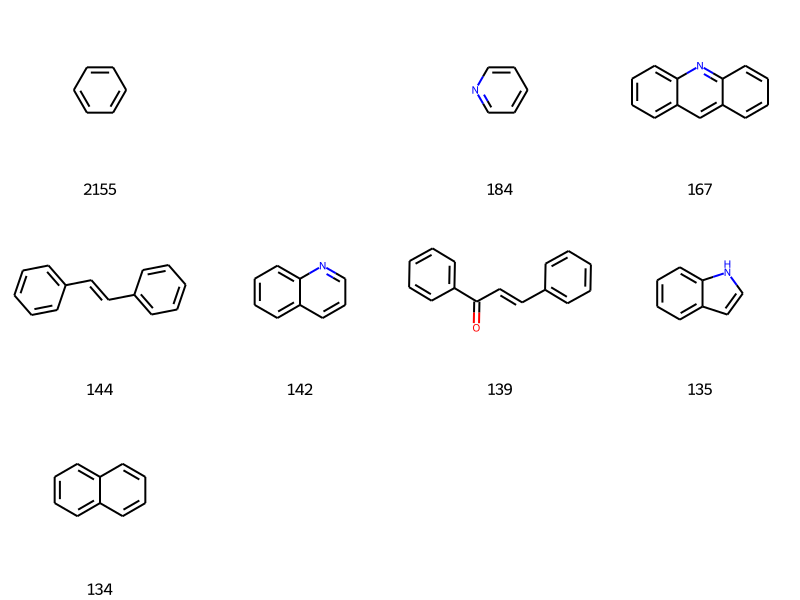

In [18]:
PandasTools.FrameToGridImage(sortedScaffolds.dropna().head(9), legendsCol='count', 
                             molsPerRow=4) # dropna() drops compounds without scaffold

In [59]:
df.shape

(10409, 5)

,chembl_id,QED,smi,scaffold,generic
0,CHEMBL3989817,0.191471,COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>","<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

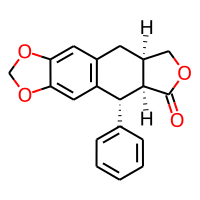
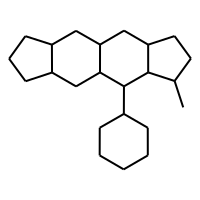

In [60]:
df.head(1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10409 entries, 0 to 10408
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   chembl_id  10409 non-null  object 
 1   QED        10409 non-null  float64
 2   smi        10409 non-null  object 
 3   scaffold   10409 non-null  object 
 4   generic    10409 non-null  object 
dtypes: float64(1), object(4)
memory usage: 487.9+ KB


In [62]:
%matplotlib inline


In [63]:
import pylab

In [64]:
data = [df[df['SMILES'] == x]['pIC50'] for x in df['SMILES'].head(8)]

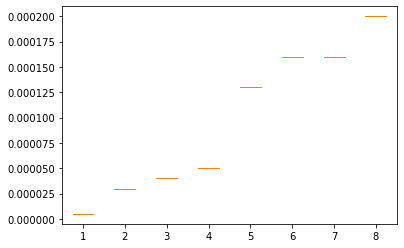

In [65]:
pylab.boxplot(data)
pylab.show()